Este codigo realiza uma analise inicial dos dados do arquivo CSV, mostrando informacoes basicas e preparando a coluna de datas:
- `pd.read_csv(...)`: carrega o CSV em um DataFrame;
- `head()`: mostra as primeiras linhas para checar colunas e formatos;
- `info()`: exibe tipos das colunas e contagem de valores nulos;
- `describe()`: estatisticas descritivas das colunas numericas;
- `isnull().sum()`: quantifica valores nulos por coluna;
- `to_datetime(..., errors='coerce')`: converte strings de data; valores invalidos viram NaT;
- `dtypes`: mostra os tipos de dados finais das colunas;

In [3]:
import pandas as pd

df = pd.read_csv("tmdb_5000_movies.csv")

print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

df['release_date'] = pd.to_datetime(df["release_date"], errors="coerce")
print(df.dtypes)

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

Este codigo seleciona e visualiza os 10 filmes com maior receita:
- `sort_values("revenue", ascending=False).head(10)`: ordena os filmes por receita e seleciona os 10 maiores;
- `print(...)`: exibe titulo, orcamento e receita desses filmes;
- `plt.bar(...)`: cria um grafico de barras mostrando a receita dos 10 filmes mais lucrativos;
- `plt.xticks(...)`, `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`, `plt.tight_layout()`, `plt.show()`: ajustam rotulos, titulo, e exibem o grafico;

                          title     budget     revenue
0                        Avatar  237000000  2787965087
25                      Titanic  200000000  1845034188
16                 The Avengers  220000000  1519557910
28               Jurassic World  150000000  1513528810
44                    Furious 7  190000000  1506249360
7       Avengers: Age of Ultron  280000000  1405403694
124                      Frozen  150000000  1274219009
31                   Iron Man 3  200000000  1215439994
546                     Minions   74000000  1156730962
26   Captain America: Civil War  250000000  1153304495


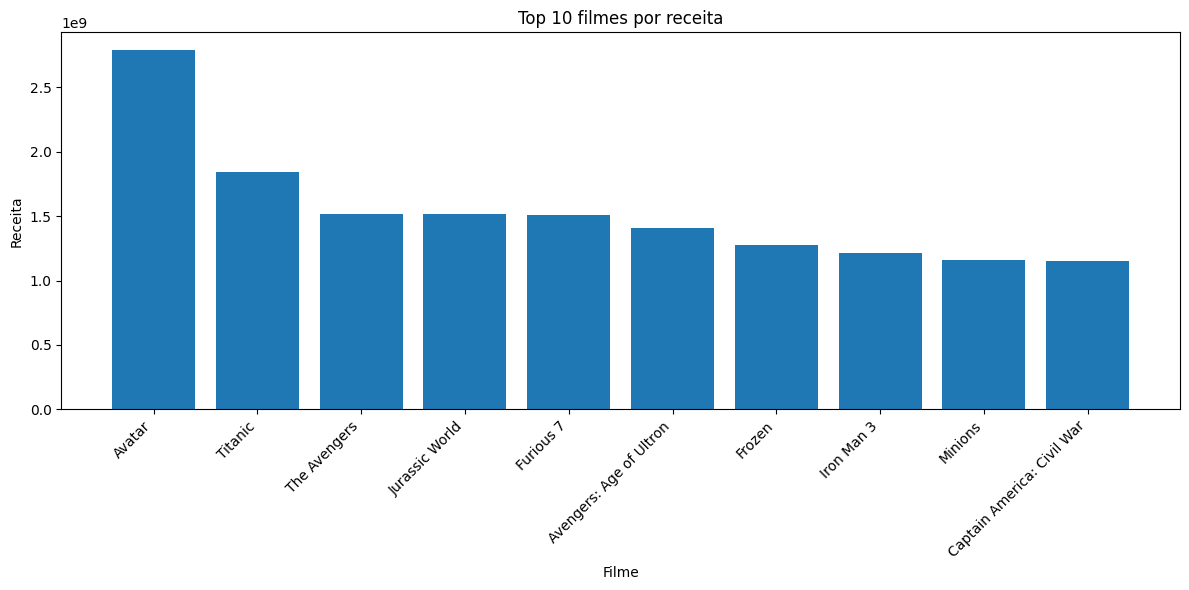

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("tmdb_5000_movies.csv")
top_10 = df.sort_values("revenue", ascending=False).head(10)

print(top_10[["title", "budget", "revenue"]])

plt.figure(figsize=(12,6))
plt.bar(top_10["title"], top_10["revenue"])
plt.xticks(rotation = 45, ha="right")
plt.title("Top 10 filmes por receita")
plt.xlabel("Filme")
plt.ylabel("Receita")
plt.tight_layout()
plt.show()

Este codigo calcula o ROI (Retorno sobre Investimento) dos filmes e mostra os 10 maiores:
- `df[df["budget"] > 0]`: filtra apenas filmes com orcamento maior que zero;
- `df["ROI"] = (df["revenue"] - df["budget"]) / df["budget"]`: calcula o ROI para cada filme;
- `sort_values(by="ROI", ascending=False).head(10)`: ordena e exibe os 10 filmes com maior ROI, mostrando titulo e valor;

In [5]:
import pandas as pd

df = pd.read_csv("tmdb_5000_movies.csv")
df = df[df["budget"] > 0]
df["ROI"] = (df["revenue"] - df["budget"]) / df["budget"]

print(df[["title", "ROI"]].sort_values(by="ROI", ascending=False).head(10))

                        title           ROI
4238             Modern Times  8.499999e+06
3137                Nurse 3-D  9.999990e+05
4577      Paranormal Activity  1.288939e+04
4582                Tarnation  5.329339e+03
4496  The Blair Witch Project  4.132333e+03
4724               Eraserhead  6.990000e+02
4788           Pink Flamingos  4.990000e+02
4742            Super Size Me  4.386166e+02
4723              The Gallows  4.256441e+02
4514               Open Water  4.195227e+02


Este codigo analisa a quantidade de filmes lancados por ano e visualiza essa evolucao:
- `to_datetime(..., errors='coerce')`: converte a coluna de datas para o tipo datetime;
- `df["year"] = ...dt.year`: extrai o ano de lancamento;
- `value_counts().sort_index()`: conta quantos filmes foram lancados em cada ano;
- `plot(kind="line", ...)` e comandos do matplotlib: plota um grafico de linha mostrando a quantidade de filmes lancados ao longo dos anos;

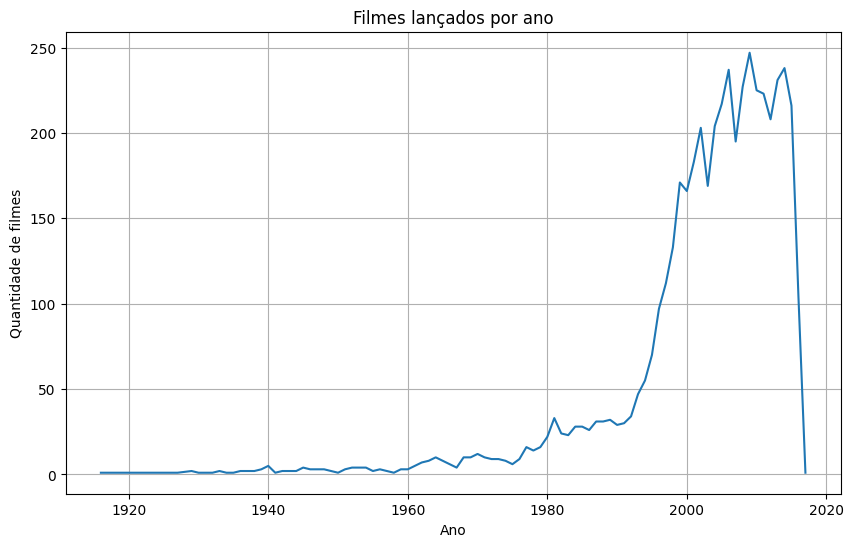

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("tmdb_5000_movies.csv")
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["year"] = df["release_date"].dt.year

count_by_year = df["year"].value_counts().sort_index()

count_by_year.plot(kind="line", figsize=(10, 6), title="Filmes lançados por ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade de filmes")
plt.grid(True)
plt.show()

Este codigo mostra a distribuicao da duracao dos filmes em minutos:
- `df["runtime"].dropna()`: seleciona a coluna de duracao e remove valores nulos;
- `plt.hist(..., bins=30)`: plota um histograma com 30 faixas para visualizar a distribuicao das duracoes;
- Comandos do matplotlib: ajustam titulo, rotulos e exibem o grafico;

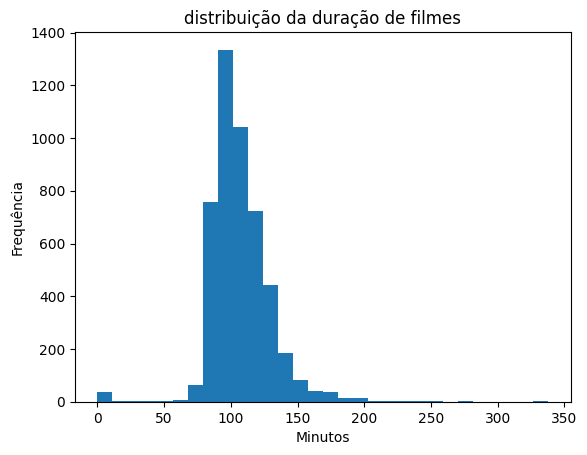

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("tmdb_5000_movies.csv")

plt.hist(df["runtime"].dropna(), bins=30)
plt.title("distribuição da duração de filmes")
plt.xlabel("Minutos")
plt.ylabel("Frequência")
plt.show()

Este codigo exibe os 10 filmes mais populares e os 10 com maior numero de votos:
- `sort_values(by="popularity", ascending=False).head(10)`: mostra os 10 filmes mais populares;
- `sort_values(by="vote_count", ascending=False).head(10)`: mostra os 10 filmes com mais votos;
- `print(...)`: exibe titulo e valor correspondente em cada caso;

In [8]:
import pandas as pd

df = pd.read_csv("tmdb_5000_movies.csv")

print("Top 10 por popularidade")
print(df[["title", "popularity"]].sort_values(by="popularity", ascending=False).head(10))

print("\nTop 10 por número de votos:")
print(df[["title", "vote_count"]].sort_values(by="vote_count", ascending=False).head(10))

Top 10 por popularidade
                                                 title  popularity
546                                            Minions  875.581305
95                                        Interstellar  724.247784
788                                           Deadpool  514.569956
94                             Guardians of the Galaxy  481.098624
127                                 Mad Max: Fury Road  434.278564
28                                      Jurassic World  418.708552
199  Pirates of the Caribbean: The Curse of the Bla...  271.972889
82                      Dawn of the Planet of the Apes  243.791743
200              The Hunger Games: Mockingjay - Part 1  206.227151
88                                          Big Hero 6  203.734590

Top 10 por número de votos:
                       title  vote_count
96                 Inception       13752
65           The Dark Knight       12002
0                     Avatar       11800
16              The Avengers       11776
788  

Este codigo calcula a media das notas dos filmes agrupados por idioma original:
- `groupby("original_language")["vote_average"].mean()`: agrupa por idioma e calcula a media das notas;
- `sort_values(ascending=False)`: ordena do maior para o menor;
- `print(...)`: exibe o resultado;

In [9]:
import pandas as pd
df = pd.read_csv("tmdb_5000_movies.csv")

avg_by_lang = df.groupby("original_language")["vote_average"].mean().sort_values(ascending=False)
print(avg_by_lang)

original_language
te    7.500000
id    7.400000
he    7.400000
fa    7.375000
ar    7.300000
nl    7.175000
da    7.128571
pl    7.100000
xx    7.100000
sv    7.060000
ja    7.050000
it    7.028571
af    6.900000
el    6.900000
is    6.900000
nb    6.700000
ko    6.672727
es    6.659375
cn    6.500000
hu    6.500000
fr    6.430000
pt    6.388889
ru    6.354545
de    6.325926
zh    6.300000
ps    6.300000
no    6.100000
en    6.065683
hi    6.010526
sl    6.000000
th    5.966667
ta    5.850000
cs    5.650000
vi    5.000000
tr    4.300000
ro    3.650000
ky    0.000000
Name: vote_average, dtype: float64


Este codigo identifica os generos mais frequentes entre os filmes:
- `ast.literal_eval`: converte a coluna `genres` de string para lista de dicionarios;
- Extrai apenas o nome dos generos de cada filme;
- Soma todos os generos em uma lista unica e conta a frequencia de cada um com `Counter`;
- `most_common(10)`: exibe os 10 generos mais comuns;

In [10]:
import pandas as pd
import ast
from collections import Counter

df = pd.read_csv("tmdb_5000_movies.csv")
df["genres"] = df["genres"].apply(lambda x: [d["name"] for d in ast.literal_eval(x)] if pd.notnull(x) else[])

all_genres = sum(df["genres"], [])
genre_counts = Counter(all_genres)

print(genre_counts.most_common(10))

[('Drama', 2297), ('Comedy', 1722), ('Thriller', 1274), ('Action', 1154), ('Romance', 894), ('Adventure', 790), ('Crime', 696), ('Science Fiction', 535), ('Horror', 519), ('Family', 513)]


Este codigo identifica as palavras-chave mais frequentes nos filmes:
- `ast.literal_eval`: converte a coluna `keywords` de string para lista de dicionarios;
- Extrai apenas o nome das palavras-chave de cada filme;
- Soma todas as palavras-chave em uma lista unica e conta a frequencia de cada uma com `Counter`;
- `most_common(10)`: exibe as 10 palavras-chave mais comuns;

In [11]:
import pandas as pd
import ast
from collections import Counter

df = pd.read_csv("tmdb_5000_movies.csv")
df["keywords"] = df["keywords"].apply(lambda x: [d["name"] for d in ast.literal_eval(x)] if pd.notnull(x) else [])

all_keywords = sum(df["keywords"], [])
keywords_counts = Counter(all_keywords)

print(keywords_counts.most_common(10))

[('woman director', 324), ('independent film', 318), ('duringcreditsstinger', 307), ('based on novel', 197), ('murder', 189), ('aftercreditsstinger', 170), ('violence', 150), ('dystopia', 139), ('sport', 126), ('revenge', 118)]


Este codigo identifica as produtoras mais frequentes nos filmes:
- `ast.literal_eval`: converte a coluna `production_companies` de string para lista de dicionarios;
- Extrai apenas o nome das produtoras de cada filme;
- Soma todas as produtoras em uma lista unica e conta a frequencia de cada uma com `Counter`;
- `most_common(10)`: exibe as 10 produtoras mais comuns;

In [12]:
import pandas as pd
import ast
from collections import Counter

df = pd.read_csv("tmdb_5000_movies.csv")
df["production_companies"] = df["production_companies"].apply(lambda x: [d["name"] for d in ast.literal_eval(x)] if pd.notnull(x) else[])

all_companies = sum(df["production_companies"], [])
company_counts = Counter(all_companies)

print(company_counts.most_common(10))

[('Warner Bros.', 319), ('Universal Pictures', 311), ('Paramount Pictures', 285), ('Twentieth Century Fox Film Corporation', 222), ('Columbia Pictures', 201), ('New Line Cinema', 165), ('Metro-Goldwyn-Mayer (MGM)', 122), ('Touchstone Pictures', 118), ('Walt Disney Pictures', 114), ('Relativity Media', 102)]
